In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
casas = pd.read_csv('/content/3LWxnSPoTikFflATrLPV_kc_house_data.csv.xls')

In [ ]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [ ]:
casas.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999
mean,4549550315,533437,3,2,2053,16037,1,0,3,8,1750,303,1967,92,98078,48,-122,1976,13359
std,2863858862,377055,1,1,911,45043,1,1,1,1,811,451,28,418,54,0,0,672,27316
min,1000102,75000,0,0,380,572,1,0,1,3,380,0,1900,0,98001,47,-123,620,660
25%,2114000745,315000,3,2,1410,5428,1,0,3,7,1180,0,1950,0,98032,47,-122,1490,5418
50%,3905010100,445838,3,2,1890,7920,1,0,3,7,1530,0,1969,0,98065,48,-122,1830,7848
75%,7272000620,639950,4,2,2500,11176,2,0,4,8,2130,600,1990,0,98118,48,-122,2340,10374
max,9842300540,7700000,11,8,12050,1651359,4,4,5,13,8860,4820,2015,2015,98199,48,-121,5790,871200


In [ ]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

In [ ]:
#Metodo do Z score:
#O método z-score utiliza como referencia a quantos desvios padrões a informação está da média
#Se Z-score > 3 desvios padroes geralmente se pode considerar um outlier.
# z = (x - u)/desviop / limites = 3
#def substituir(dataset, limite, coluna):
  ### funcao que faz um replace para NaN (valor nulo) caso seja encontrado um outlier
   # casas = dataset[coluna]
   # outliers = []
   # zscore = []
   # val = []
   # limite = limite
   # mean = np.mean(casas)
   # std = np.std(casas)
   # for i in casas.values:
   #   z_score= (i - mean)/std
   #   zscore.append(z_score)
   #   if np.abs(z_score) > limite:
   #       outliers.append(i)
   #       val.append(np.nan)
   #   else:
   #       val.append(i)
   # return val

In [ ]:
#def remove(dataset, limite):
  ### vamos utilizar a funcao drop NA para remover outliers
 # for column in dataset.select_dtypes(include=np.number).columns:
  #  dataset[column] =  substituir(dataset, 3, column)
  #return dataset.dropna(how='any')

In [ ]:
#casas_na = remove(casas, 3)

In [ ]:
#vendo outliers com boxplot
#plt.rcParams['figure.figsize'] = [8, 4]
#sns.set_theme()
### para cada uma das colunas numericas roda o boxplot
#for column in casas.select_dtypes(include=np.number).columns:
    #plt.figure()
    #sns.boxplot(data = casas, x = column, color='cyan',showfliers=True)
    #plt.title("Boxplot: "+column + " casas")

'Considerando a base de dados kc_house_data.csv responda as questões de 1
a 6 abaixo:
1. Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço price e o número de
quartos bedrooms? Existe alguma diferença na correlação quando
consideramos apenas casas com uma área total sqft_living superior a
2000 pés quadrados?

In [ ]:
num_casas = casas.select_dtypes(include=['float64','int64'])
corr = num_casas.corr()

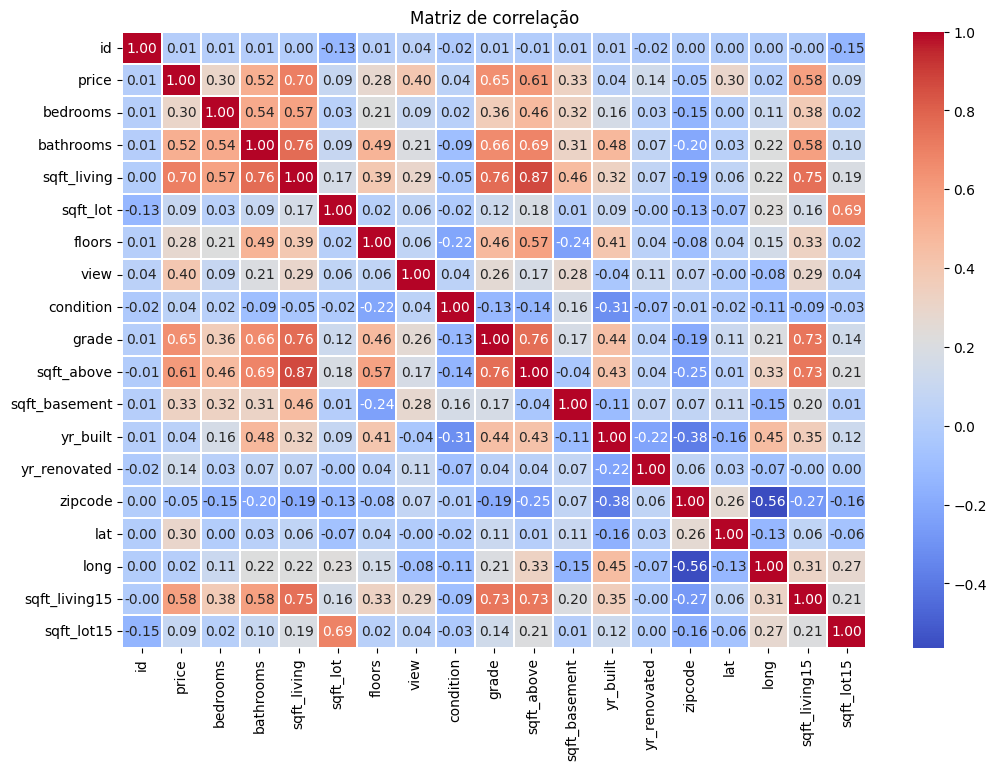

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.3)
plt.title('Matriz de correlação')
plt.show()

In [ ]:
#CORRIGIR, FAZER UMA CORRELAÇÃO COM 1 OU MAIS quartos, 2 OU MAIS
#correlacao = num_casas['price'].corr(num_casas['bedrooms'])
#print(f'A correlação entre o número de quartos e o preço é: {correlacao:.2f}')
def quarto(data, numeros):
    dado_quarto = casas[casas['bedrooms'] == numeros]
    corre_quarto = round(dado_quarto['price'].corr(dado_quarto['sqft_living']),4)
    return corre_quarto

In [ ]:
for numeros in range(0,int(casas['bedrooms'].max())):
    print(f'A correlação do preço com a área de acordo com {numeros} quartos é: {quarto(casas,numeros)}')

A correlação do preço com a área de acordo com 0 quartos é: 0.8783
A correlação do preço com a área de acordo com 1 quartos é: 0.4705
A correlação do preço com a área de acordo com 2 quartos é: 0.6364
A correlação do preço com a área de acordo com 3 quartos é: 0.611
A correlação do preço com a área de acordo com 4 quartos é: 0.693
A correlação do preço com a área de acordo com 5 quartos é: 0.7506
A correlação do preço com a área de acordo com 6 quartos é: 0.8311
A correlação do preço com a área de acordo com 7 quartos é: 0.5737
A correlação do preço com a área de acordo com 8 quartos é: 0.7897
A correlação do preço com a área de acordo com 9 quartos é: -0.7685
A correlação do preço com a área de acordo com 10 quartos é: nan


In [ ]:
def maisquartos(data,numeros):
    dataset = casas[casas['bedrooms'] >= numeros]
    correla_quarto = round(dataset['price'].corr(dataset['sqft_living']),4)
    return correla_quarto

In [ ]:
for numeros in range(0,int(casas['bedrooms'].max())):
    print(f'A correlação do preço com a área de acordo com {numeros} ou mais quartos é: {maisquartos(casas,numeros)}')

A correlação do preço com a área de acordo com 0 ou mais quartos é: 0.7022
A correlação do preço com a área de acordo com 1 ou mais quartos é: 0.702
A correlação do preço com a área de acordo com 2 ou mais quartos é: 0.7021
A correlação do preço com a área de acordo com 3 ou mais quartos é: 0.7082
A correlação do preço com a área de acordo com 4 ou mais quartos é: 0.7224
A correlação do preço com a área de acordo com 5 ou mais quartos é: 0.7654
A correlação do preço com a área de acordo com 6 ou mais quartos é: 0.8051
A correlação do preço com a área de acordo com 7 ou mais quartos é: 0.5717
A correlação do preço com a área de acordo com 8 ou mais quartos é: 0.5741
A correlação do preço com a área de acordo com 9 ou mais quartos é: -0.0012
A correlação do preço com a área de acordo com 10 ou mais quartos é: nan


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [ ]:
#correlação da área e preço
correlacao_area = num_casas['sqft_living'].corr(num_casas['price'])
print(f'A correlação entre a área e o preço é: {correlacao_area:.2f}')

A correlação entre a área e o preço é: 0.70


In [ ]:
##correlação da área e preço com sqft_living superior a 2000 pés quadrados
maior = num_casas[num_casas['sqft_living'] > 2000]
correlacao_maior = maior['sqft_living'].corr(maior['price'])
print(f'A correlação entre áreas maiores que 2000 pés quadrados e o preço é: {correlacao_maior:.2f}')

A correlação entre áreas maiores que 2000 pés quadrados e o preço é: 0.69


2. Existe alguma correlação entre o preço price e a área total da casa
sqft_living, considerando apenas casas com pelo menos dois
banheiros bathrooms?

In [ ]:
maior_dois = num_casas[num_casas['bathrooms'] >= 2]
correlacao_banheiros = maior_dois['sqft_living'].corr(maior_dois['price'])
print(f'A correlação entre ter 2 banheiros e o preço é: {correlacao_banheiros:.2f}')

A correlação entre ter 2 banheiros e o preço é: 0.71


3. Como a quantidade de banheiros bathrooms influencia na correlação
entre a área total da casa sqft_living e o preço price?

In [ ]:
def banheiros(data, numeros):
    dado_banheiros = casas[casas['bathrooms'] == numeros]
    corre_banheiro = round(dado_banheiros['price'].corr(dado_banheiros['sqft_living']),4)
    return corre_banheiro

In [ ]:
for numeros in range(0,int(casas['bathrooms'].max())):
    print(f'A correlação do preço com a área de acordo com {numeros} banheiros é: {banheiros(casas,numeros)}')

A correlação do preço com a área de acordo com 0 banheiros é: 0.9168
A correlação do preço com a área de acordo com 1 banheiros é: 0.3595
A correlação do preço com a área de acordo com 2 banheiros é: 0.4469
A correlação do preço com a área de acordo com 3 banheiros é: 0.569
A correlação do preço com a área de acordo com 4 banheiros é: 0.5845
A correlação do preço com a área de acordo com 5 banheiros é: 0.7472
A correlação do preço com a área de acordo com 6 banheiros é: 1.0
A correlação do preço com a área de acordo com 7 banheiros é: nan


In [ ]:
def maisbanheiros(data,numeros):
    dataset = casas[casas['bathrooms'] >= numeros]
    correla_banheiros = round(dataset['price'].corr(dataset['sqft_living']),4)
    return correla_banheiros

In [ ]:
for numeros in range(0,int(casas['bathrooms'].max())):
    print(f'A correlação do preço com a área de acordo com {numeros} ou mais banheiros é: {maisbanheiros(casas,numeros)}')

A correlação do preço com a área de acordo com 0 ou mais banheiros é: 0.7022
A correlação do preço com a área de acordo com 1 ou mais banheiros é: 0.7018
A correlação do preço com a área de acordo com 2 ou mais banheiros é: 0.7067
A correlação do preço com a área de acordo com 3 ou mais banheiros é: 0.7159
A correlação do preço com a área de acordo com 4 ou mais banheiros é: 0.7895
A correlação do preço com a área de acordo com 5 ou mais banheiros é: 0.8389
A correlação do preço com a área de acordo com 6 ou mais banheiros é: 0.8426
A correlação do preço com a área de acordo com 7 ou mais banheiros é: 0.9869


4. Qual é a relação entre a condição da casa condition e o preço price,
considerando apenas casas com uma área total sqft_living superior a
3000 pés quadrados?


In [ ]:
tres = num_casas[num_casas['sqft_living'] > 3000]
correlacao_tres = tres['condition'].corr(maior['price'])
print(f'A correlação entre condition e o preço em áreas maiores que 3000 pés quadrados é: {correlacao_tres:.2f}')

A correlação entre condition e o preço em áreas maiores que 3000 pés quadrados é: 0.11


5. Existe alguma correlação entre a localização geográfica lat e long e o
preço price para casas com pelo menos três quartos bedrooms?

In [ ]:
maior_tres = num_casas[num_casas['bathrooms'] >= 3]
correlacao_banheirostres = maior_tres['lat'].corr(maior_tres['price'])
print(f'A correlação entre ter 3 banheiros e a localização geográfica lat é: {correlacao_banheirostres:.2f}')

A correlação entre ter 3 banheiros e a localização geográfica lat é: 0.18


In [ ]:
correlacao_banheirostreslong = maior_tres['long'].corr(maior_tres['price'])
print(f'A correlação entre ter 3 banheiros e a localização geográfica lat é: {correlacao_banheirostreslong:.2f}')

A correlação entre ter 3 banheiros e a localização geográfica lat é: -0.03


6. Calcule a correlação entre uma variável categórica(waterfront) e uma
variável numérica(price) usando ANOVA.


In [ ]:
model = ols('price ~ C(waterfront)', data=casas).fit()
tabela_anova = sm.stats.anova_lm(model, typ =2)
tabela_anova
#na tabela, PR(>F) é o valor de p, ou seja, por ser pequeno, rejeita-se a hipótese de que a variável waterfront não influencia no preço.

,sum_sq,df,F,PR(>F)
C(waterfront),125078955238696,1,965,0
Residual,1296339306997409,9997,NaN,NaN


In [ ]:
casas['waterfront'].unique()

array(['n', 'y'], dtype=object)

In [ ]:
waterfront = casas[casas['waterfront']=='n']
waterfront['price'].describe()

,price
count,9920
mean,523456
std,343019
min,75000
25%,315000
50%,445000
75%,635000
max,7700000


In [ ]:
waterfront = casas[casas['waterfront']=='y']
waterfront['price'].describe()

,price
count,79
mean,1786740
std,1287249
min,290000
25%,954975
50%,1450000
75%,2175000
max,7060000


Considerando a base de dados car_price.csv responda as questões de 7 a 11
abaixo:
7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e
dê exemplos de correlações positivas, negativas e neutras.


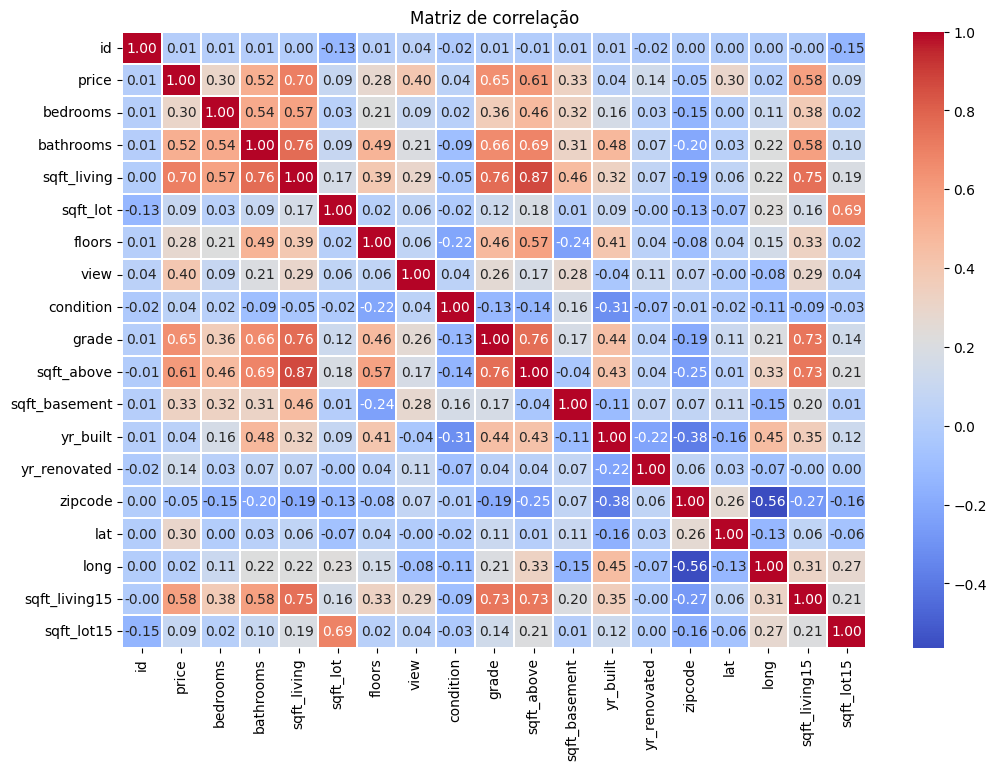

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.3)
plt.title('Matriz de correlação')
plt.show()

##Correlações:
##Positivas = sqft_living e bathrooms (0.76)
##Negativas =  condition e floors ( - 0.22)
##Neutras = bathrooms e lat ( 0.03)

8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis
numéricas em relação à variável de interesse Price.


In [ ]:
num_casas = num_casas.drop(columns=['id','zipcode'])

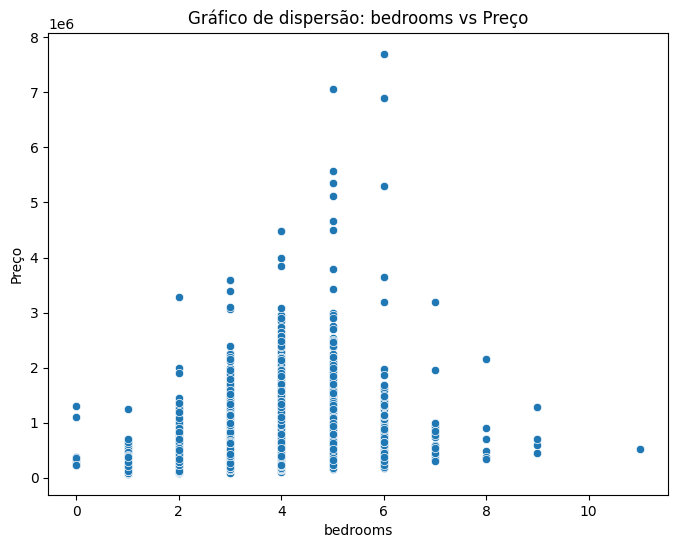

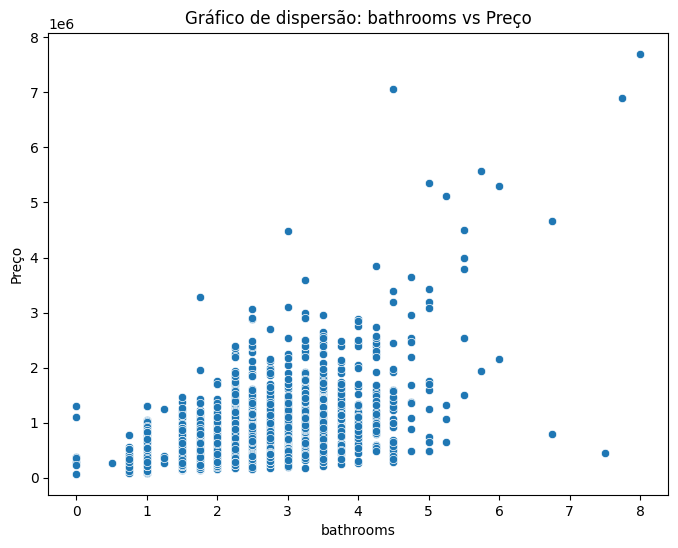

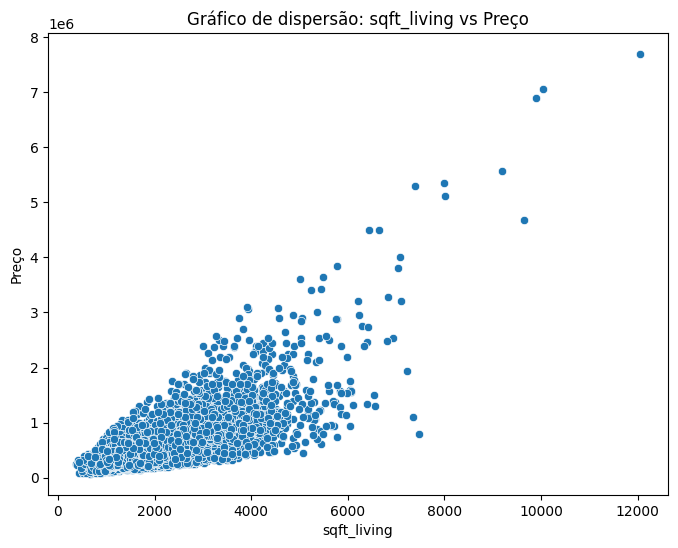

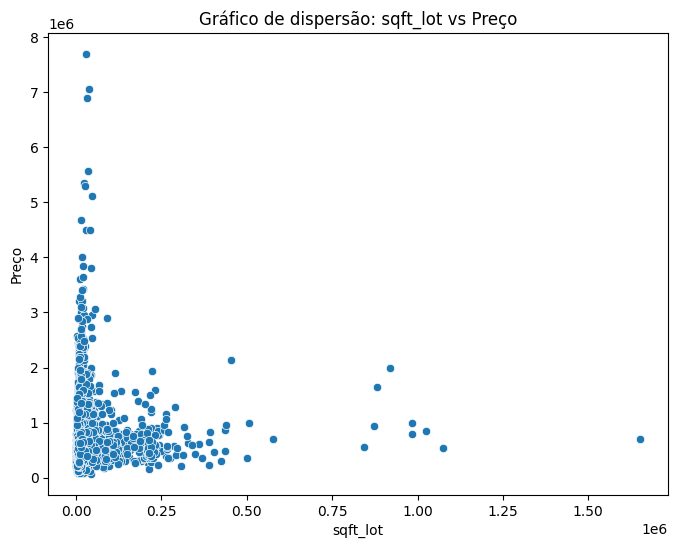

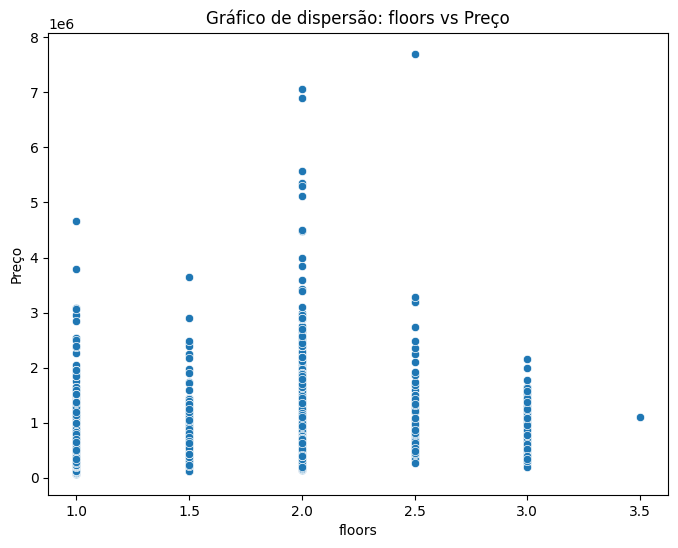

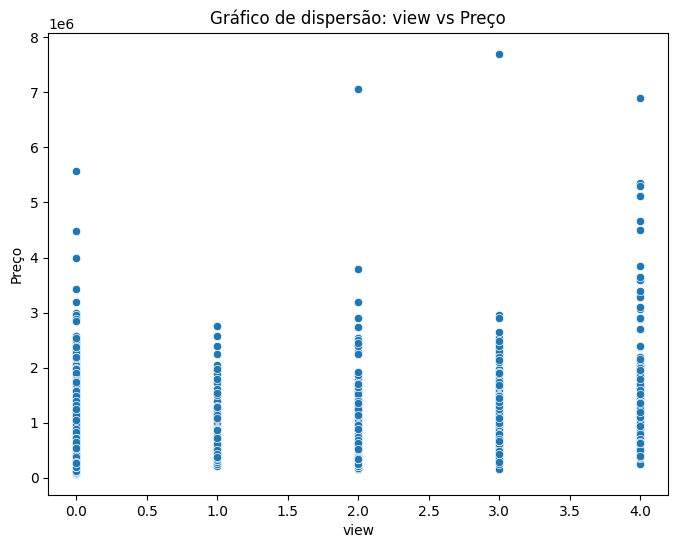

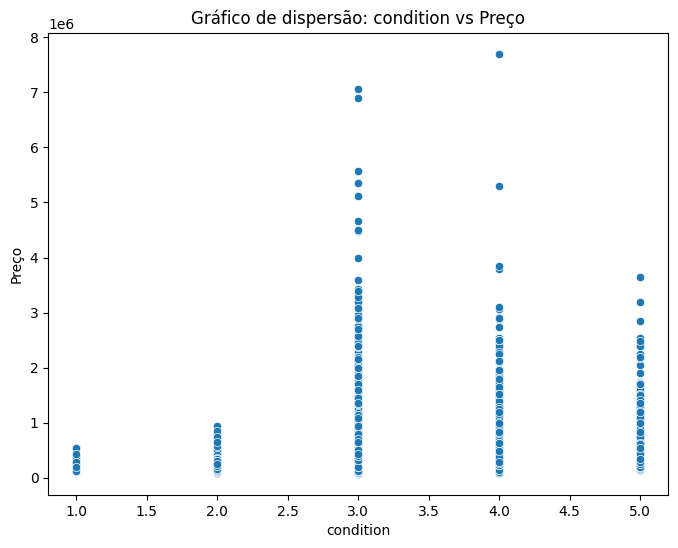

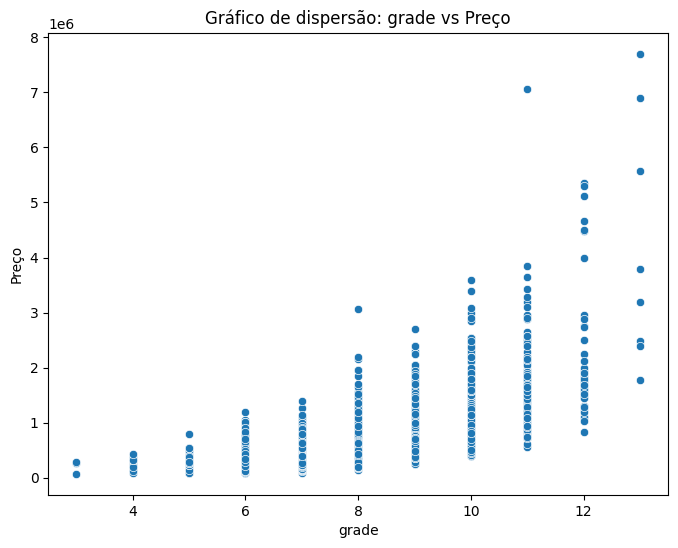

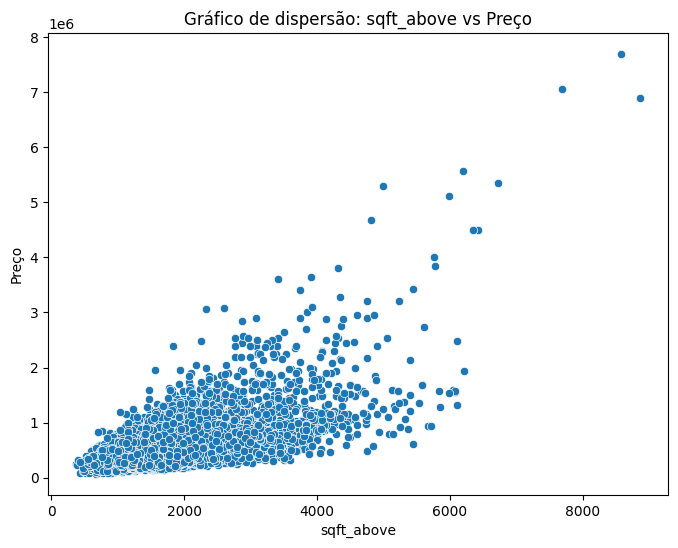

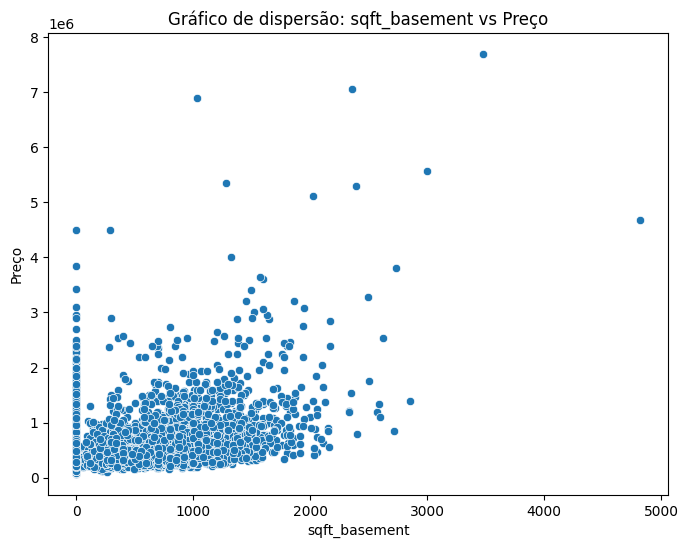

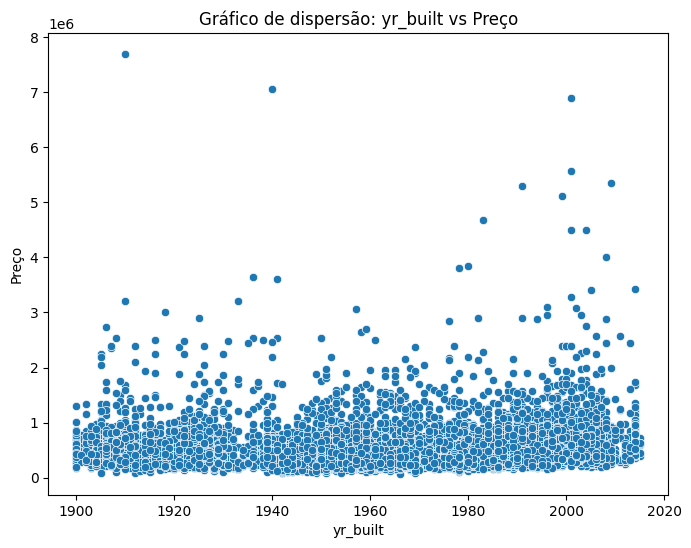

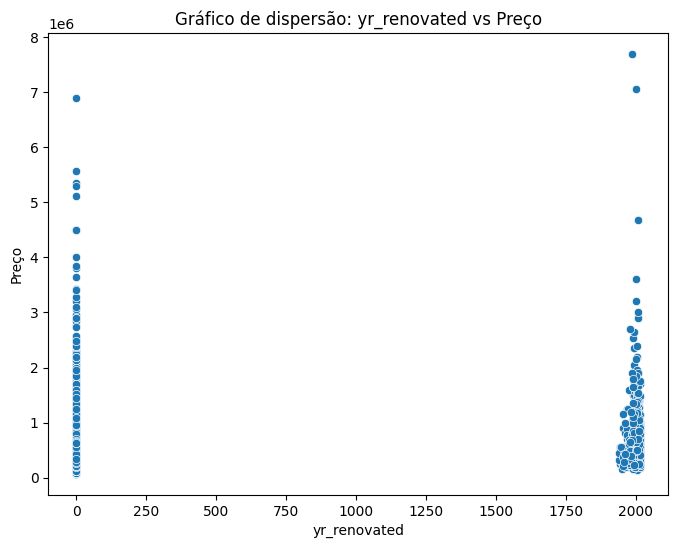

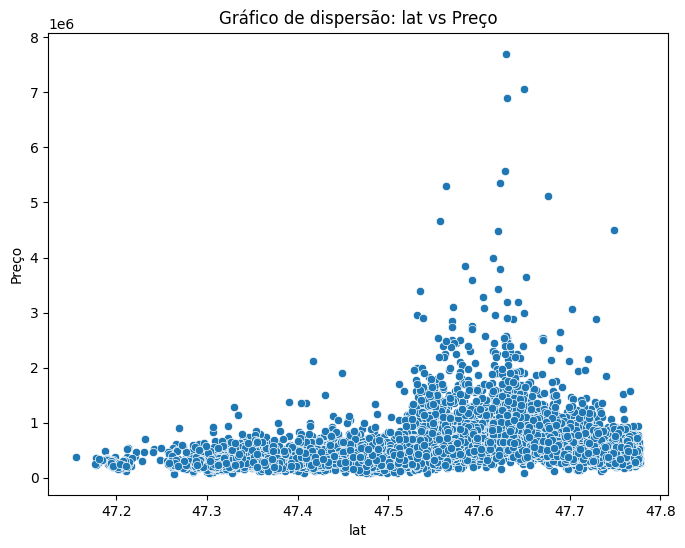

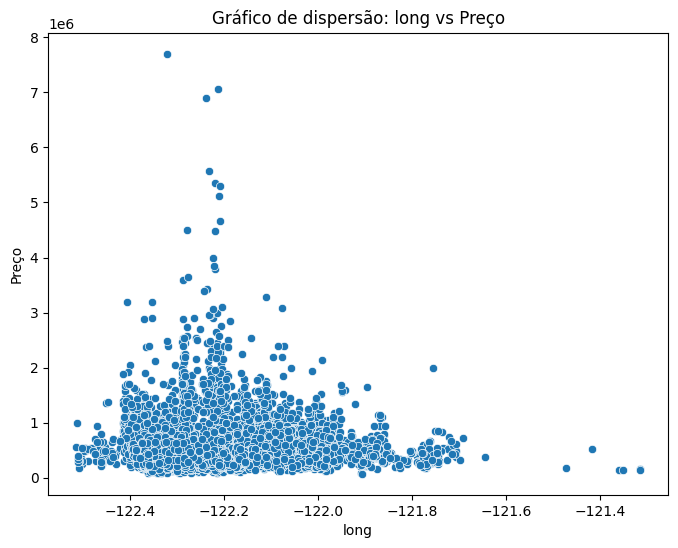

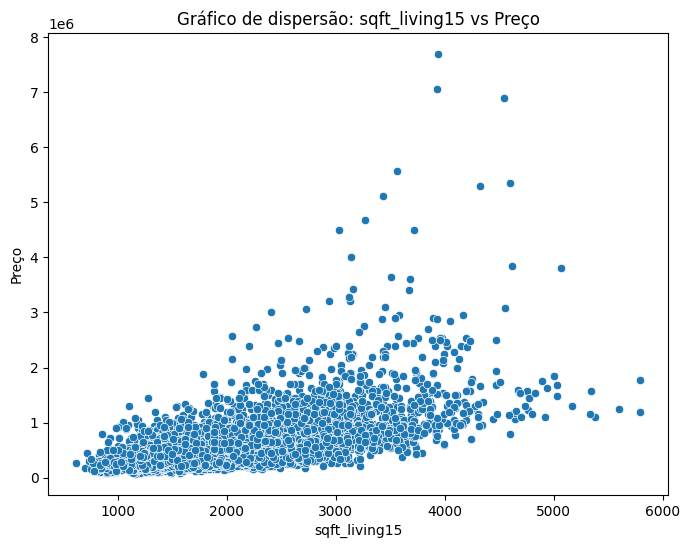

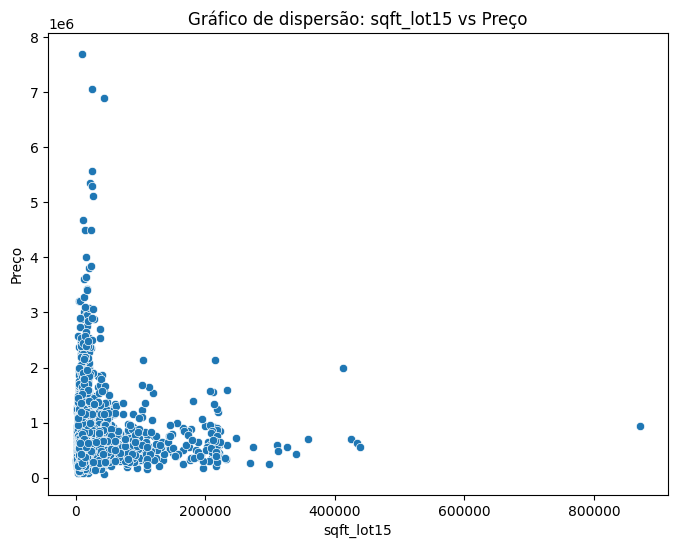

In [ ]:
for coluna in num_casas.columns:
    if coluna != 'price':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=num_casas, x=coluna, y="price")
        plt.title(f'Gráfico de dispersão: {coluna} vs Preço')
        plt.xlabel(coluna)
        plt.ylabel("Preço")
        plt.show()

9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de
Regressão e exiba o plot da Reta Estimada.

In [ ]:
X = casas['sqft_living']
Y = casas['price']
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     9724.
Date:                Sun, 13 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:45:30   Log-Likelihood:            -1.3918e+05
No. Observations:                9999   AIC:                         2.784e+05
Df Residuals:                    9997   BIC:                         2.784e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.311e+04   6618.505     -9.536      

<Axes: xlabel='sqft_living', ylabel='price'>

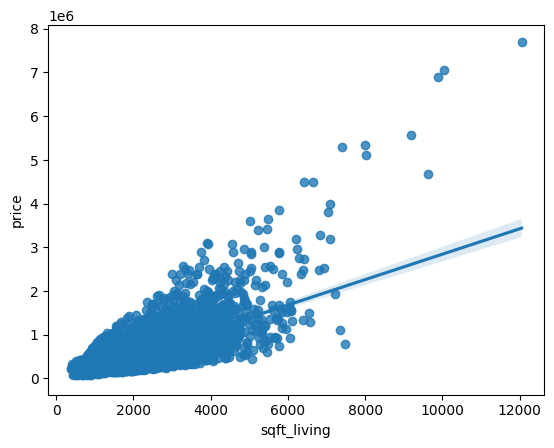

In [ ]:
var = 'sqft_living'
sns.regplot(x=var, y='price', data=casas)

10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão
Simples.

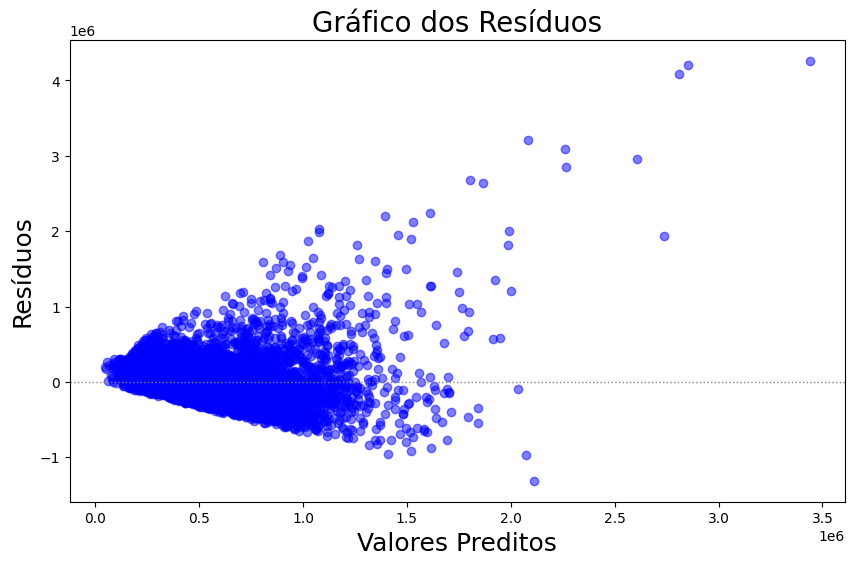

In [ ]:
y = model.predict(X)
residuals = Y - y

# Plotar os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='grey', linestyle=':', lw=1)
plt.xlabel('Valores Preditos', fontsize=18)
plt.ylabel('Resíduos', fontsize=18)
plt.title('Gráfico dos Resíduos', fontsize=20)
plt.show()

11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão
e exiba o gráfico dos resíduos do modelo.

In [ ]:
casas.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
remover = ['zipcode','lat','long','id','date']
num_casas = casas.drop(columns=remover)
num_casas = casas.select_dtypes(include=['float64','int64'])

In [ ]:
# Adicionar uma constante ao modelo
X = sm.add_constant(num_casas)
Y = casas['price']
mv_model = sm.OLS(Y, X).fit()
print(mv_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.190e+30
Date:                Sun, 13 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:52:20   Log-Likelihood:             1.7511e+05
No. Observations:                9999   AIC:                        -3.502e+05
Df Residuals:                    9980   BIC:                        -3.500e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.546e-09   1.28e-07      0.075

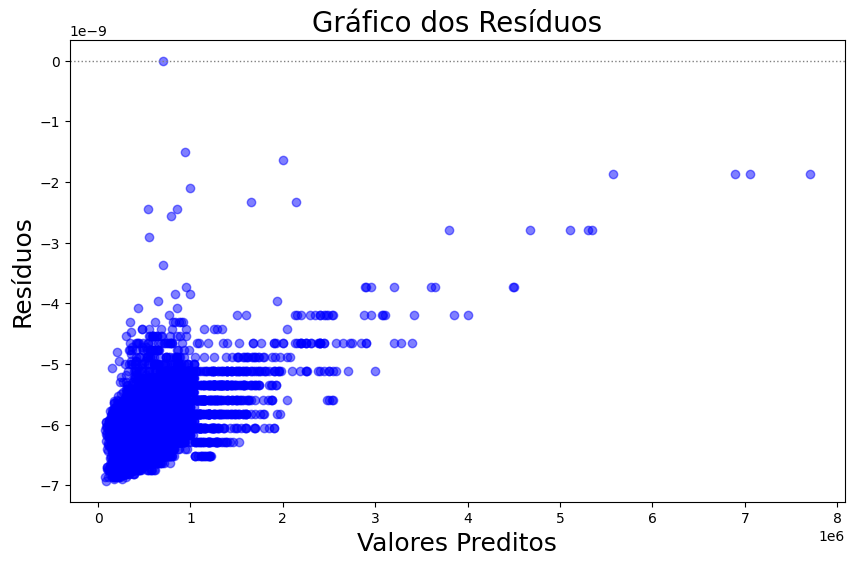

In [ ]:
# Calcular os valores preditos e os resíduos
y = mv_model.predict(X)
residuals = Y - y

# Plotar os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='grey', linestyle=':', lw=1)
plt.xlabel('Valores Preditos', fontsize=18)
plt.ylabel('Resíduos', fontsize=18)
plt.title('Gráfico dos Resíduos', fontsize=20)
plt.show()